## Validation sets

#### Load data

In [1]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/bf/15/d1b649fc7685d11b806b4546a5438191fb2ad761de70da95ff676189dcec/scikit_learn-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 10.2 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 12.5 MB/s eta 0:00:00


In [1]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
# Save the input and target variables

data = diabetes_dataset.data
target = diabetes_dataset.target

In [3]:
# Normalise the target data (this will make clearer training curves)

target = (target - target.mean()) / target.std()

In [4]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [5]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    
    return model

model = get_model()

2023-08-06 00:57:53.613580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-06 00:57:53.649952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-06 00:57:53.650464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-06 00:57:53.657320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-06 00:57:53.658342: I tensorflow/compile

In [6]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67585 (264.00 KB)
Trainable params: 67585 

In [7]:
# Compile the model

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [8]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs=100, batch_size=64, validation_split=0.15, verbose=2)

Epoch 1/100


2023-08-06 01:01:56.991456: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-06 01:01:57.693320: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1db78330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-06 01:01:57.693373: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2023-08-06 01:01:57.719730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-06 01:01:58.049780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-06 01:01:58.267527: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

6/6 - 6s - loss: 0.9502 - mae: 0.8338 - val_loss: 1.0312 - val_mae: 0.8531 - 6s/epoch - 931ms/step
Epoch 2/100
6/6 - 0s - loss: 0.8813 - mae: 0.8041 - val_loss: 0.8989 - val_mae: 0.8087 - 153ms/epoch - 26ms/step
Epoch 3/100
6/6 - 0s - loss: 0.7245 - mae: 0.7266 - val_loss: 0.6987 - val_mae: 0.7480 - 158ms/epoch - 26ms/step
Epoch 4/100
6/6 - 0s - loss: 0.5487 - mae: 0.6068 - val_loss: 0.7058 - val_mae: 0.7217 - 162ms/epoch - 27ms/step
Epoch 5/100
6/6 - 0s - loss: 0.4924 - mae: 0.5417 - val_loss: 0.6461 - val_mae: 0.6904 - 141ms/epoch - 23ms/step
Epoch 6/100
6/6 - 0s - loss: 0.4674 - mae: 0.5447 - val_loss: 0.6405 - val_mae: 0.6857 - 138ms/epoch - 23ms/step
Epoch 7/100
6/6 - 0s - loss: 0.4510 - mae: 0.5352 - val_loss: 0.6464 - val_mae: 0.6832 - 114ms/epoch - 19ms/step
Epoch 8/100
6/6 - 0s - loss: 0.4491 - mae: 0.5262 - val_loss: 0.6502 - val_mae: 0.6755 - 142ms/epoch - 24ms/step
Epoch 9/100
6/6 - 0s - loss: 0.4406 - mae: 0.5246 - val_loss: 0.6542 - val_mae: 0.6905 - 113ms/epoch - 19ms/st

6/6 - 0s - loss: 0.0961 - mae: 0.2351 - val_loss: 1.0718 - val_mae: 0.8115 - 125ms/epoch - 21ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1021 - mae: 0.2349 - val_loss: 1.0306 - val_mae: 0.7906 - 108ms/epoch - 18ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1037 - mae: 0.2542 - val_loss: 1.0398 - val_mae: 0.8022 - 127ms/epoch - 21ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1159 - mae: 0.2633 - val_loss: 1.0488 - val_mae: 0.8015 - 124ms/epoch - 21ms/step
Epoch 77/100
6/6 - 0s - loss: 0.1012 - mae: 0.2424 - val_loss: 1.0373 - val_mae: 0.7931 - 112ms/epoch - 19ms/step
Epoch 78/100
6/6 - 0s - loss: 0.0976 - mae: 0.2291 - val_loss: 1.0240 - val_mae: 0.7843 - 126ms/epoch - 21ms/step
Epoch 79/100
6/6 - 0s - loss: 0.0983 - mae: 0.2415 - val_loss: 1.0738 - val_mae: 0.8104 - 123ms/epoch - 21ms/step
Epoch 80/100
6/6 - 0s - loss: 0.0920 - mae: 0.2296 - val_loss: 1.1038 - val_mae: 0.8081 - 132ms/epoch - 22ms/step
Epoch 81/100
6/6 - 0s - loss: 0.0997 - mae: 0.2422 - val_loss: 1.0700 - val_mae: 0.8100 - 120ms/epoch

In [9]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.7956 - mae: 0.6338 - 40ms/epoch - 20ms/step


[0.7955968379974365, 0.6337675452232361]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

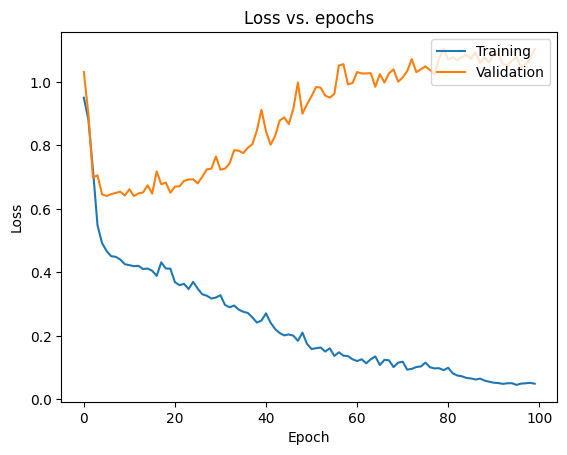

In [11]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()